24279.78566033516


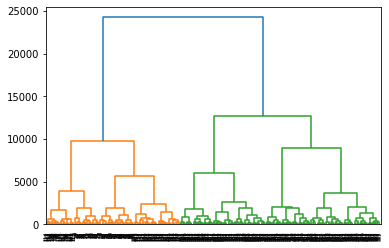

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import ast
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import math

df1 = pd.read_csv('./SMAI - AQ2/CSV/TLBR_68.csv')

k = 3

# data['x1'] = data['Top-Left'].apply(lambda x: float(x.strip('[]').split(',')[0]))
# data['y1'] = data['Top-Left'].apply(lambda x: float(x.strip('[]').split(',')[1]))
# data['x2'] = data['Bottom-Right'].apply(lambda x: float(x.strip('[]').split(',')[0]))
# data['y2'] = data['Bottom-Right'].apply(lambda x: float(x.strip('[]').split(',')[1]))

# X = data[['x1', 'y1', 'x2', 'y2']]

df1['Top-Left'] = df1['Top-Left'].apply(ast.literal_eval)
df1['Bottom-Right'] = df1['Bottom-Right'].apply(ast.literal_eval)
data = np.array(df1)


def metric_calc(x,y):
    # Calculate the centers of edges for rectangle x
    x_top_center = [(x[1][0] + x[2][0]) / 2, x[1][1]]
    x_bottom_center = [(x[1][0] + x[2][0]) / 2, x[2][1]]
    x_left_center = [x[1][0], (x[1][1] + x[2][1]) / 2]
    x_right_center = [x[2][0], (x[1][1] + x[2][1]) / 2]

    # Calculate the centers of edges for rectangle y
    y_top_center = [(y[1][0] + y[2][0]) / 2, y[1][1]]
    y_bottom_center = [(y[1][0] + y[2][0]) / 2, y[2][1]]
    y_left_center = [y[1][0], (y[1][1] + y[2][1]) / 2]
    y_right_center = [y[2][0], (y[1][1] + y[2][1]) / 2]

    # Calculate the Euclidean distances between all pairs of centers
    distances = [
        math.dist(x_top_center, y_top_center),
        math.dist(x_top_center, y_bottom_center),
        math.dist(x_top_center, y_left_center),
        math.dist(x_top_center, y_right_center),
        math.dist(x_bottom_center, y_top_center),
        math.dist(x_bottom_center, y_bottom_center),
        math.dist(x_bottom_center, y_left_center),
        math.dist(x_bottom_center, y_right_center),
        math.dist(x_left_center, y_top_center),
        math.dist(x_left_center, y_bottom_center),
        math.dist(x_left_center, y_left_center),
        math.dist(x_left_center, y_right_center),
        math.dist(x_right_center, y_top_center),
        math.dist(x_right_center, y_bottom_center),
        math.dist(x_right_center, y_left_center),
        math.dist(x_right_center, y_right_center),
    ]

    return np.min(distances)

pairwise_distances = pdist(data, metric=metric_calc)
linkage_matrix = linkage(pairwise_distances, method='ward')
# print(linkage_matrix.shape)
dendrogram(linkage_matrix)
max_depth = linkage_matrix[:,2].max()
print(max_depth)


In [2]:
def left_Edge(x):    
    return [x[1][0], (x[1][1] + x[2][1]) // 2]

def right_Edge(x):
    return [x[2][0], (x[1][1] + x[2][1]) // 2]

def up_Edge(x):
    return [(x[1][0] + x[2][0]) // 2, x[1][1]]

def down_Edge(x):
    return [(x[1][0] + x[2][0]) // 2, x[2][1]]

In [3]:
import cv2
def calculate_distances_dir(x, y):
    # Calculate the centers of edges for rectangle x
    x_top_center = [(x[1][0] + x[2][0]) / 2, x[1][1]]
    x_bottom_center = [(x[1][0] + x[2][0]) / 2, x[2][1]]
    x_left_center = [x[1][0], (x[1][1] + x[2][1]) / 2]
    x_right_center = [x[2][0], (x[1][1] + x[2][1]) / 2]

    # Calculate the centers of edges for rectangle y
    y_top_center = [(y[1][0] + y[2][0]) / 2, y[1][1]]
    y_bottom_center = [(y[1][0] + y[2][0]) / 2, y[2][1]]
    y_left_center = [y[1][0], (y[1][1] + y[2][1]) / 2]
    y_right_center = [y[2][0], (y[1][1] + y[2][1]) / 2]

    # Calculate the Euclidean distances between all pairs of centers
    distances = [
        ("U", "U", math.dist(x_top_center, y_top_center)),
        ("U", "D", math.dist(x_top_center, y_bottom_center)),
        ("U", "L", math.dist(x_top_center, y_left_center)),
        ("U", "R", math.dist(x_top_center, y_right_center)),
        ("D", "U", math.dist(x_bottom_center, y_top_center)),
        ("D", "D", math.dist(x_bottom_center, y_bottom_center)),
        ("D", "L", math.dist(x_bottom_center, y_left_center)),
        ("D", "R", math.dist(x_bottom_center, y_right_center)),
        ("L", "U", math.dist(x_left_center, y_top_center)),
        ("L", "D", math.dist(x_left_center, y_bottom_center)),
        ("L", "L", math.dist(x_left_center, y_left_center)),
        ("L", "R", math.dist(x_left_center, y_right_center)),
        ("R", "U", math.dist(x_right_center, y_top_center)),
        ("R", "D", math.dist(x_right_center, y_bottom_center)),
        ("R", "L", math.dist(x_right_center, y_left_center)),
        ("R", "R", math.dist(x_right_center, y_right_center)),
    ]

    min_distance = float('inf')
    min_direction_x = ""
    min_direction_y = ""

    for direction_x, direction_y, distance in distances:
        if distance < min_distance:
            min_distance = distance
            min_direction_x = direction_x
            min_direction_y = direction_y

    return min_distance, min_direction_x, min_direction_y

In [4]:
def levelwise_clusters(linkage_matrix):
    n = linkage_matrix.shape[0] + 1
    clusters = {i: [i] for i in range(n)}
    all_clusters = []
    for i in range(n):
        all_clusters.append([i])    
    for i in range(n - 1):
        a, b, _, _ = linkage_matrix[i].astype(int)
        merged = clusters[a] + clusters[b]
        clusters[n + i] = merged
        del clusters[a]
        del clusters[b]   
        all_clusters.append(merged)
    return all_clusters
clusters = levelwise_clusters(linkage_matrix)

In [5]:
df_box = pd.read_csv("./SMAI - AQ2/CSV/TLBR_68.csv")
img1 = cv2.imread("./SMAI - AQ2/images/68.jpg")

In [6]:
countmap = {}
fclusters = []
# Chatgpt idea to limit the occurences of the words till threshold k. fclusters contain all the clusters
# uptill threshold k.
for i in range(len(clusters)):
    clust = clusters[i]
    check = 1
    for j in range(len(clust)):
        present = False
        if clust[j] in countmap:
            present = True
        if present:
            if countmap[clust[j]] >= k:
                check = 0
                continue
            else:
                countmap[clust[j]] += 1
                if(countmap[clust[j]] > k):
                    check = 0
        else:
            countmap[clust[j]] = 1
            check = 0
    if(check == 1):
        fclusters.append(clust)

In [7]:
def visualize_bboxes(img, df, corresponding_cluster):
  img_2 = img.copy()

  for key, value in corresponding_cluster.items():
        key_coord = [0, 0]
        value_coord = [0, 0]

        if(value[2] == 'U'):
            value_coord = tuple(up_Edge(data[value[0]]))
        elif(value[2] == 'D'):
            value_coord = tuple(down_Edge(data[value[0]]))
        elif(value[2] == 'L'):
            value_coord = tuple(left_Edge(data[value[0]]))
        else:
            value_coord = tuple(right_Edge(data[value[0]]))
        
        if(key[1]=='U'):
            key_coord = tuple(up_Edge(data[key[0]]))
        elif(key[1]=='D'):
            key_coord = tuple(down_Edge(data[key[0]]))
        elif(key[1]=='L'):
            key_coord = tuple(left_Edge(data[key[0]]))
        else:
            key_coord = tuple(right_Edge(data[key[0]]))

        cv2.line(img_2, key_coord, value_coord, (0,0,0), thickness=10)
        
    # Chatgpt prompt to extract coordinates from datafram [top_left and bottom_right]
  for _, rows in df.iterrows():
        top_left_coords = (int(rows['Top-Left'].split(',')[0][1:]), int(rows['Top-Left'].split(',')[1][:-1]))
        bottom_right_coords = (int(rows['Bottom-Right'].split(',')[0][1:]), int(rows['Bottom-Right'].split(',')[1][:-1]))
        cv2.rectangle(img_2, top_left_coords, bottom_right_coords, (255, 0, 0), 2)

  _,axs = plt.subplots(1,1,figsize=(50,80))
  axs.imshow(img_2)
  plt.axis('off')
  plt.savefig('./linkages.png')

In [8]:
corresponding_cluster = {}
occurrences = {}
k = 3
max_occurrences = 10

# Chatgpt prompt to update corresponding_cluster map for minimum distances and previous occurences values.
# By updating values between all points in a cluster.

for i in range(len(fclusters)):
    curr_clust = fclusters[i]
    for j in range(0 , len(curr_clust)):
        for k in range(j + 1, len(curr_clust)):
            # Calculate the distance, direction_1, direction_2 tuple using distance_dir function.
            dist = calculate_distances_dir(data[curr_clust[j]],data[curr_clust[k]])

            presentJ = False # If jth point in the corresponding cluster
            presentK = False # If kth point in the corresponding cluster

            if (curr_clust[j], dist[1]) in corresponding_cluster:
                presentJ = True
            if (curr_clust[k], dist[2]) in corresponding_cluster:
                presentK = True
            
            if presentJ == True:
                if corresponding_cluster[(curr_clust[j],dist[1])][1] > dist[0]:
                    # Update the previous corresponding_cluster value
                    prev_mp = corresponding_cluster[(curr_clust[j], dist[1])]
                    if (prev_mp[0],prev_mp[2]) in corresponding_cluster:
                        del corresponding_cluster[(prev_mp[0],prev_mp[2])]
                    corresponding_cluster[(curr_clust[j], dist[1])] = (curr_clust[k], dist[0], dist[2])
            else:
                # New occurrence so update the corresponding_cluster value.
                corresponding_cluster[(curr_clust[j], dist[1])] = (curr_clust[k],dist[0],dist[2])
                
            if presentK == True:
                if corresponding_cluster[(curr_clust[k],dist[2])][1] > dist[0]:
                    # Update the previous corresponding_cluster value
                    prev_mp = corresponding_cluster[(curr_clust[j], dist[1])]
                    if (prev_mp[0],prev_mp[2]) in corresponding_cluster:
                        del corresponding_cluster[(prev_mp[0],prev_mp[2])]
                    corresponding_cluster[(curr_clust[k], dist[2])] = (curr_clust[j],dist[0],dist[1])
            else:
                # New occurrence so update the corresponding_cluster value.
                corresponding_cluster[(curr_clust[k], dist[2])] = (curr_clust[j],dist[0],dist[1])
                
print(len(corresponding_cluster))

817


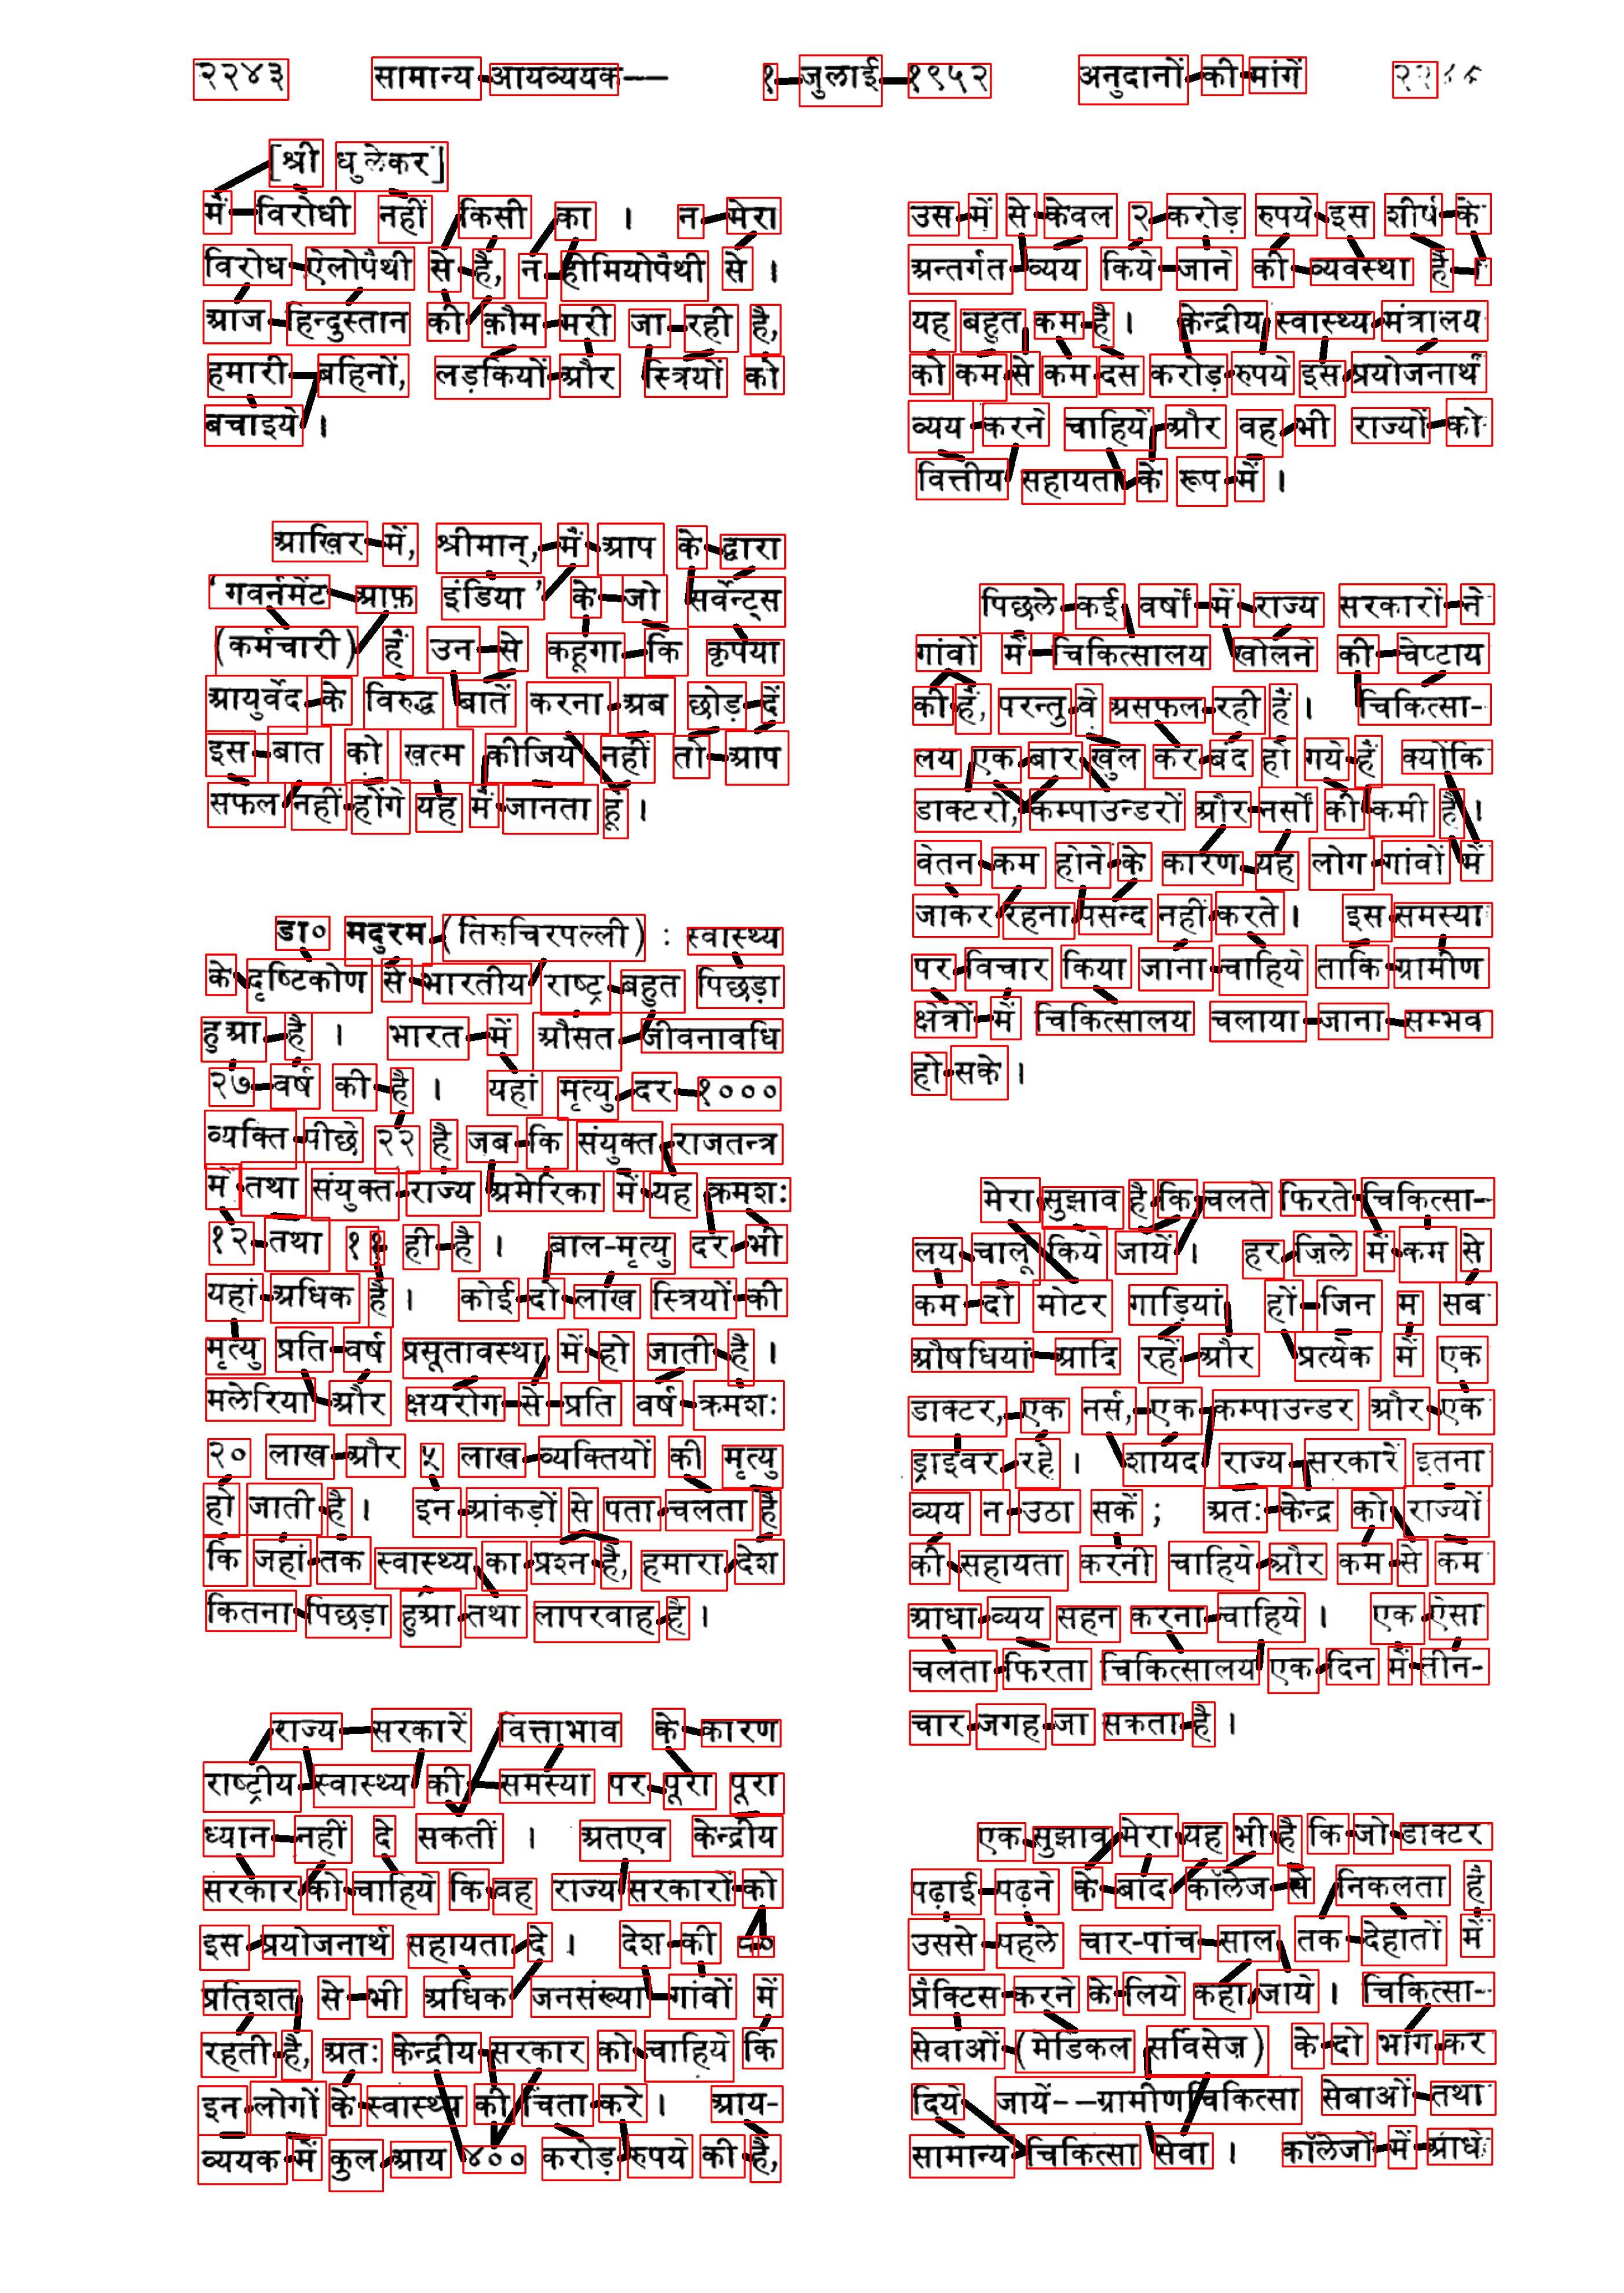

In [9]:
visualize_bboxes(img1,df_box, corresponding_cluster)